In [52]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [15]:
#df = pd.read_csv('../experimental-results/results_mocked.csv', sep=',',header=0)

In [16]:
#df

In [105]:
def plot_chart_for_workload(filename : str):
    df = pd.read_csv('../experimental-results/' + filename, sep=',',header=0)

    datasets = ['books_200M_uint64', 'fb_200M_uint64', 'osm_cellids_200M_uint64', 'wiki_ts_200M_uint64']

    best_results_alex = []
    best_results_btree = []
    best_results_dpgm = []
    for dataset_name in datasets:
        best_results_alex.append(df[(df["dataset_name"] == dataset_name) & (df["index_name"]=='ALEX')]['throughput_in_s'].max())
        best_results_btree.append(df[(df["dataset_name"] == dataset_name) & (df["index_name"]=='BTree')]['throughput_in_s'].max())
        best_results_dpgm.append(df[(df["dataset_name"] == dataset_name) & (df["index_name"]=='DynamicPGM')]['throughput_in_s'].max())

    N = 4
    ind = np.arange(N) 
    width = 0.17

    fig, ax = plt.subplots()
    bar1 = plt.bar(ind, best_results_alex, width, color = 'green')
    bar2 = plt.bar(ind+width, best_results_btree, width, color = 'orange')
    bar3 = plt.bar(ind+width*2, best_results_dpgm, width, color = 'blue')
    
    plt.xlabel("Dataset")
    plt.ylabel('Throughput (million ops / sec)')

    plt.xticks(ind+width,['books', 'fb', 'osmc', 'wiki'])


    # Put a legend above plot
    plt.legend((bar1, bar2, bar3), ('ALEX', 'B-Tree', 'Dynamic-PGM'), bbox_to_anchor=(0,1.02,1,0.2), loc='upper center', ncol=4)
    plt.show()

## Non-poisoned

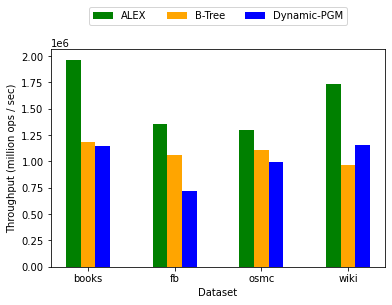

In [109]:
plot_chart_for_workload('non_poisoned_read_only.csv')

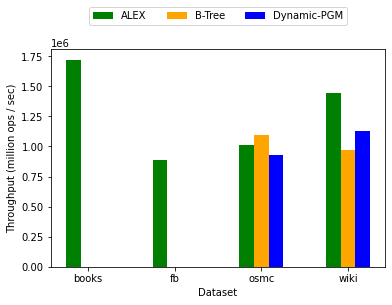

In [110]:
plot_chart_for_workload('non_poisoned_read_heavy.csv')

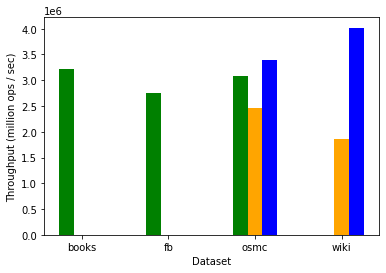

In [102]:
plot_chart_for_workload('non_poisoned_write_heavy.csv')

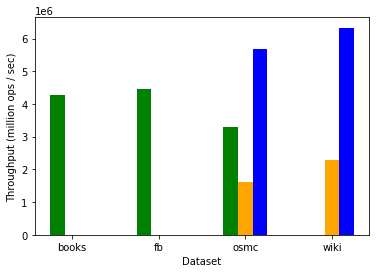

In [104]:
plot_chart_for_workload('non_poisoned_write_only.csv')

## Poisoned